# Introdução
***Sobre o Dataset***

Este dataset contém uma lista de jogos eletrônicos com vendas superiores a 100.000 cópias, gerada por meio de uma raspagem do site vgchartz.com. O conjunto de dados inclui os seguintes campos:

* Rank: Classificação das vendas totais.
* Name: Nome do jogo.
* Platform: Plataforma de lançamento do jogo (por exemplo, PC, PS4, etc.).
* Year: Ano de lançamento do jogo.
* Genre: Gênero do jogo.
* Publisher: Editora do jogo.
* NA_Sales: Vendas na América do Norte (em milhões).
* EU_Sales: Vendas na Europa (em milhões).
* JP_Sales: Vendas no Japão (em milhões).
* Other_Sales: Vendas no resto do mundo (em milhões).

In [34]:
import pandas as pd

In [5]:
dados = pd.read_csv('vgsales.csv')
dados.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


O objetivo desta análise de dados é obter, a partir de cálculos e análises gráficas, sobre o comportamento da distribuição de vendas de jogos eletrônicos em três grandes potências, juntamente com o restante dos outros países e também venda global. Além disso, projetar vendas utilizando Regressão Linear para os para os próximos anos.

In [8]:
anoMax =dados.Year.max()
anoMin =dados.Year.min()
print(anoMax)
print(anoMin)

2020.0
1980.0


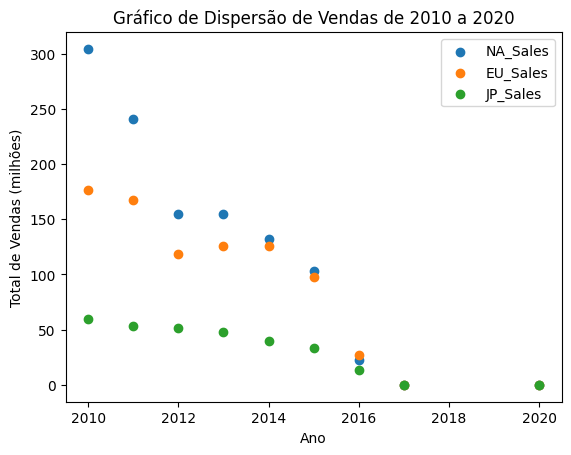

In [32]:
import matplotlib.pyplot as plt

dados['Year'] = pd.to_numeric(dados['Year'], errors='coerce')
dados_filtrados = dados[(dados['Year'] >= 2010) & (dados['Year'] <= 2020)]
vendas_por_ano = dados_filtrados.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

plt.scatter(vendas_por_ano.index, vendas_por_ano['NA_Sales'], label='NA_Sales')
plt.scatter(vendas_por_ano.index, vendas_por_ano['EU_Sales'], label='EU_Sales')
plt.scatter(vendas_por_ano.index, vendas_por_ano['JP_Sales'], label='JP_Sales')
# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Total de Vendas (milhões)')
plt.title('Gráfico de Dispersão de Vendas de 2010 a 2020')
# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()

# Comportamento das Vendas
Neste tópico será analisado o comportamento das vendas globais oferecidos pelo Dataset, de maneira a calcular seu comportamento a partir de função matemática e calcular sua acurácia.
A função matemática escolhida para modelar o comportamento das vendas será Análise de Regressão e para projetar as vendas será feito Regressão Linear.

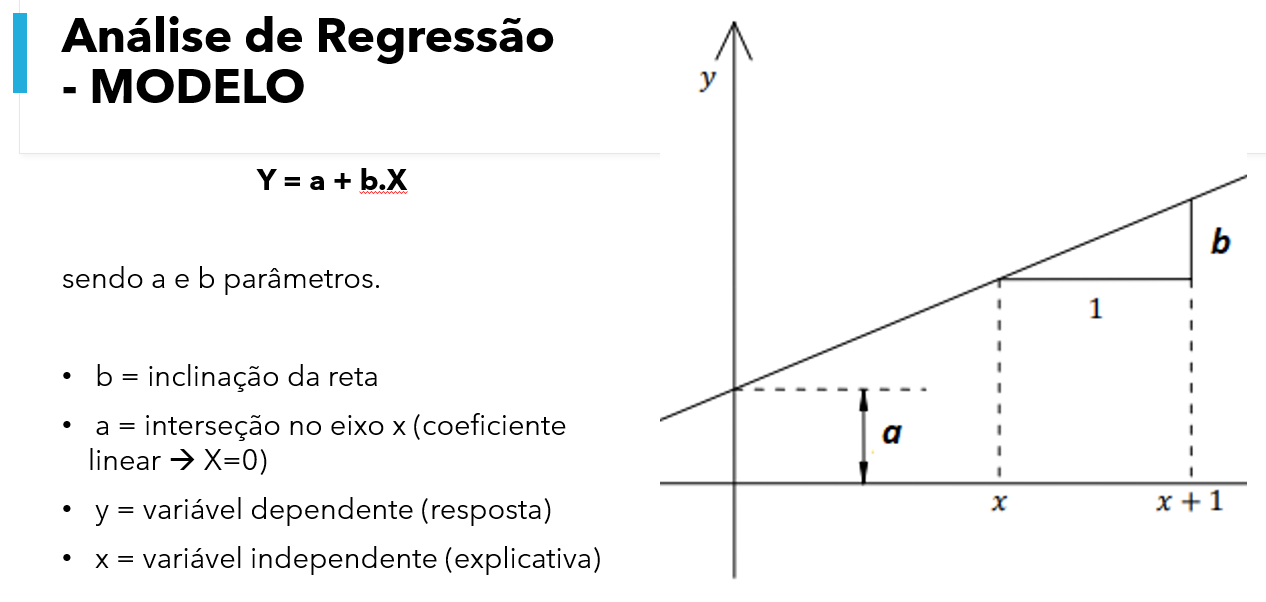

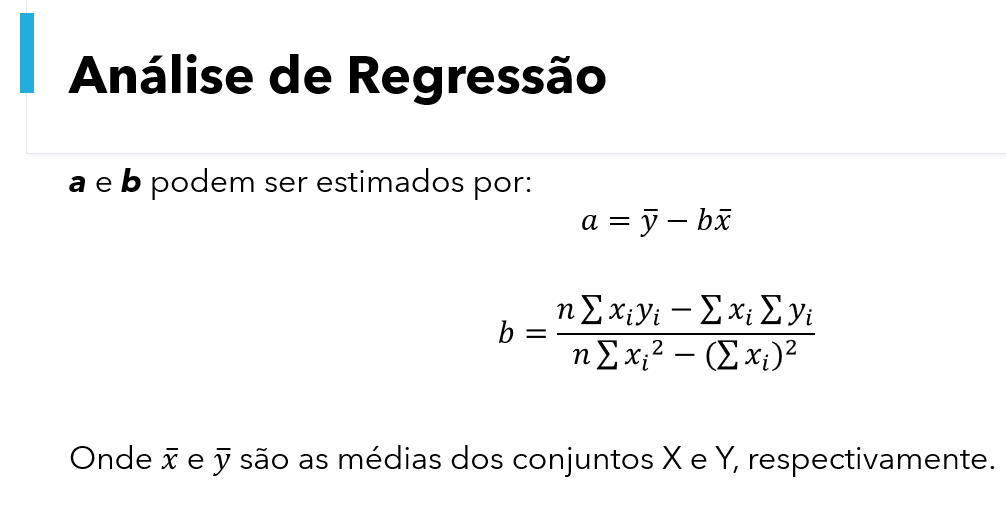

In [35]:
import numpy as np

years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
sales = np.array([10, 12, 13, 15, 20, 22, 23, 25, 27, 30, 35])

# Número de pontos
n = len(years)

# Calcular as somas
sum_x = np.sum(years)
sum_y = np.sum(sales)
sum_x2 = np.sum(years ** 2)
sum_xy = np.sum(years * sales)

# Calcular as médias
mean_x = np.mean(years)
mean_y = np.mean(sales)

# Calcular o coeficiente b
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

# Calcular o coeficiente a
a = mean_y - b * mean_x
a, b

(-4778.272727272727, 2.381818181818182)

In [36]:
# Anos futuros
anos_futuros = np.array([2021, 2022, 2023, 2024, 2025])

# Calcular as vendas projetadas usando a equação da regressão
vendas_projetadas = a + b * anos_futuros

anos_futuros, vendas_projetadas

(array([2021, 2022, 2023, 2024, 2025]),
 array([35.38181818, 37.76363636, 40.14545455, 42.52727273, 44.90909091]))

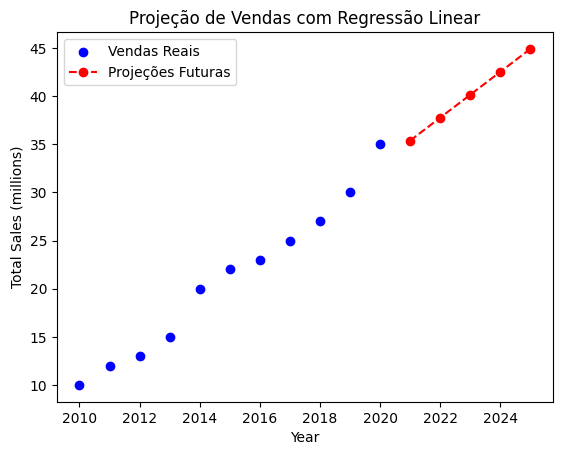

In [37]:
plt.scatter(years, sales, color='blue', label='Vendas Reais')

# Plotar as vendas projetadas
plt.plot(anos_futuros, vendas_projetadas, color='red', marker='o', linestyle='dashed', label='Projeções Futuras')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Total de Vendas (milhões)')
plt.title('Projeção de Vendas com Regressão Linear')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()


Para calcular a acurácia de um modelo de regressão linear, geralmente utilizamos métricas como o erro absoluto médio (MAE), o erro quadrático médio (MSE) ou o coeficiente de determinação (R²). Aqui está como calcular essas métricas para o modelo:

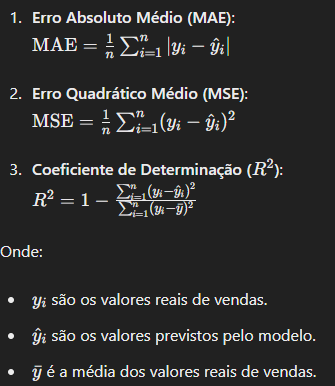

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prever as vendas para os anos históricos usando o modelo
vendas_previstas = a + b * years

# Calcular MAE, MSE e R^2
mae = mean_absolute_error(sales, vendas_previstas)
mse = mean_squared_error(sales, vendas_previstas)
r2 = r2_score(sales, vendas_previstas)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 0.9917355371902555
MSE: 1.1702479338846554
R^2: 0.9797887524978528
